In [1]:
import torch, detectron2

TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

torch:  2.1 ; cuda:  cu121
detectron2: 0.6


In [41]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import pandas as pd
from matplotlib import pyplot as plt


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

/home/luca/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [43]:
pic_list=[]
for root, dirs, files in os.walk("memes/defaults/images/", topdown=True, onerror=None, followlinks=False):
    for filename in files:
        pic_list.append(filename)
        
        
pic_list=pic_list
pic_list

['covid_memes_5594.png',
 'covid_memes_2353.png',
 'covid_memes_3945.png',
 'covid_memes_722.png',
 'covid_memes_807.png',
 'covid_memes_1602.png',
 'covid_memes_1053.png',
 'covid_memes_1769.png',
 'covid_memes_5425.png',
 'covid_memes_1052.png',
 'covid_memes_801.png',
 'covid_memes_1587.png',
 'covid_memes_4315.png',
 'covid_memes_3411.png',
 'covid_memes_2602.png',
 'covid_memes_1259.png',
 'covid_memes_871.png',
 'covid_memes_2920.png',
 'covid_memes_2306.png',
 'covid_memes_1145.png',
 'covid_memes_2086.png',
 'covid_memes_4290.png',
 'covid_memes_1920.png',
 'covid_memes_3691.png',
 'covid_memes_2373.png',
 'covid_memes_440.png',
 'covid_memes_1935.png',
 'covid_memes_5420.png',
 'covid_memes_2993.png',
 'covid_memes_3893.png',
 'covid_memes_4571.png',
 'covid_memes_5676.png',
 'covid_memes_117.png',
 'covid_memes_4698.png',
 'covid_memes_5687.png',
 'covid_memes_2012.png',
 'covid_memes_3703.png',
 'covid_memes_3781.png',
 'covid_memes_4287.png',
 'covid_memes_362.png',
 'covid

In [44]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

folder_path="memes/defaults/images/"

df=[]
for i, img_filename in enumerate(pic_list):
    print(f'{i} of {len(pic_list)}')
    path = os.path.join(folder_path,img_filename)
    im = cv2.imread(path)

    cfg = get_cfg()

    # Add project-specific configuration here
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model

    # Load model weights
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

    # Ensure Detectron2 uses CPU
    cfg.MODEL.DEVICE = "cpu"

    # Create a predictor
    predictor = DefaultPredictor(cfg)

    # Now you can use predictor on your image
    outputs = predictor(im)
    v = detectron2.utils.visualizer.Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Assuming 'outputs' is the result from the model prediction
    instances = outputs["instances"].to("cpu")

    # Extracting class names
    classes = instances.pred_classes
    class_names = [MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[i] for i in classes]

    class_names = " ".join(class_names)
    class_names
    tmp_dict = {
        "img": img_filename,
        "objects": class_names
    }
    
    df.append(tmp_dict)


df = pd.DataFrame(df)
df
    
df.to_csv("Detectron2_Objects.csv")

0 of 3544
[01/10 15:27:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
1 of 3544
[01/10 15:27:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
2 of 3544
[01/10 15:27:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
3 of 3544
[01/10 15:27:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
4 of 3544
[01/10 15:27:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loadi

libpng warning: iCCP: known incorrect sRGB profile


[01/10 15:28:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
21 of 3544
[01/10 15:28:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
22 of 3544
[01/10 15:28:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
23 of 3544
[01/10 15:28:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
24 of 3544
[01/10 15:28:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading fro

KeyboardInterrupt: 

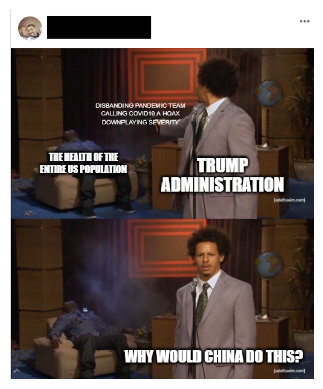

In [14]:
# Read the image
im = cv2.imread("memes/defaults/images/covid_memes_30.png")

# Convert BGR (OpenCV default) to RGB (matplotlib default)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(im_rgb)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [15]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

cfg = get_cfg()

# Add project-specific configuration here
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model

# Load model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Ensure Detectron2 uses CPU
cfg.MODEL.DEVICE = "cpu"

# Create a predictor
predictor = DefaultPredictor(cfg)

# Now you can use predictor on your image
outputs = predictor(im)


[01/10 14:33:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [34]:
v = detectron2.utils.visualizer.Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Assuming 'outputs' is the result from the model prediction
instances = outputs["instances"].to("cpu")

# Extracting class names
classes = instances.pred_classes
class_names = [MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[i] for i in classes]

class_names = " ".join(class_names)
class_names


'person person person tie person potted plant tie potted plant suitcase couch tie potted plant'

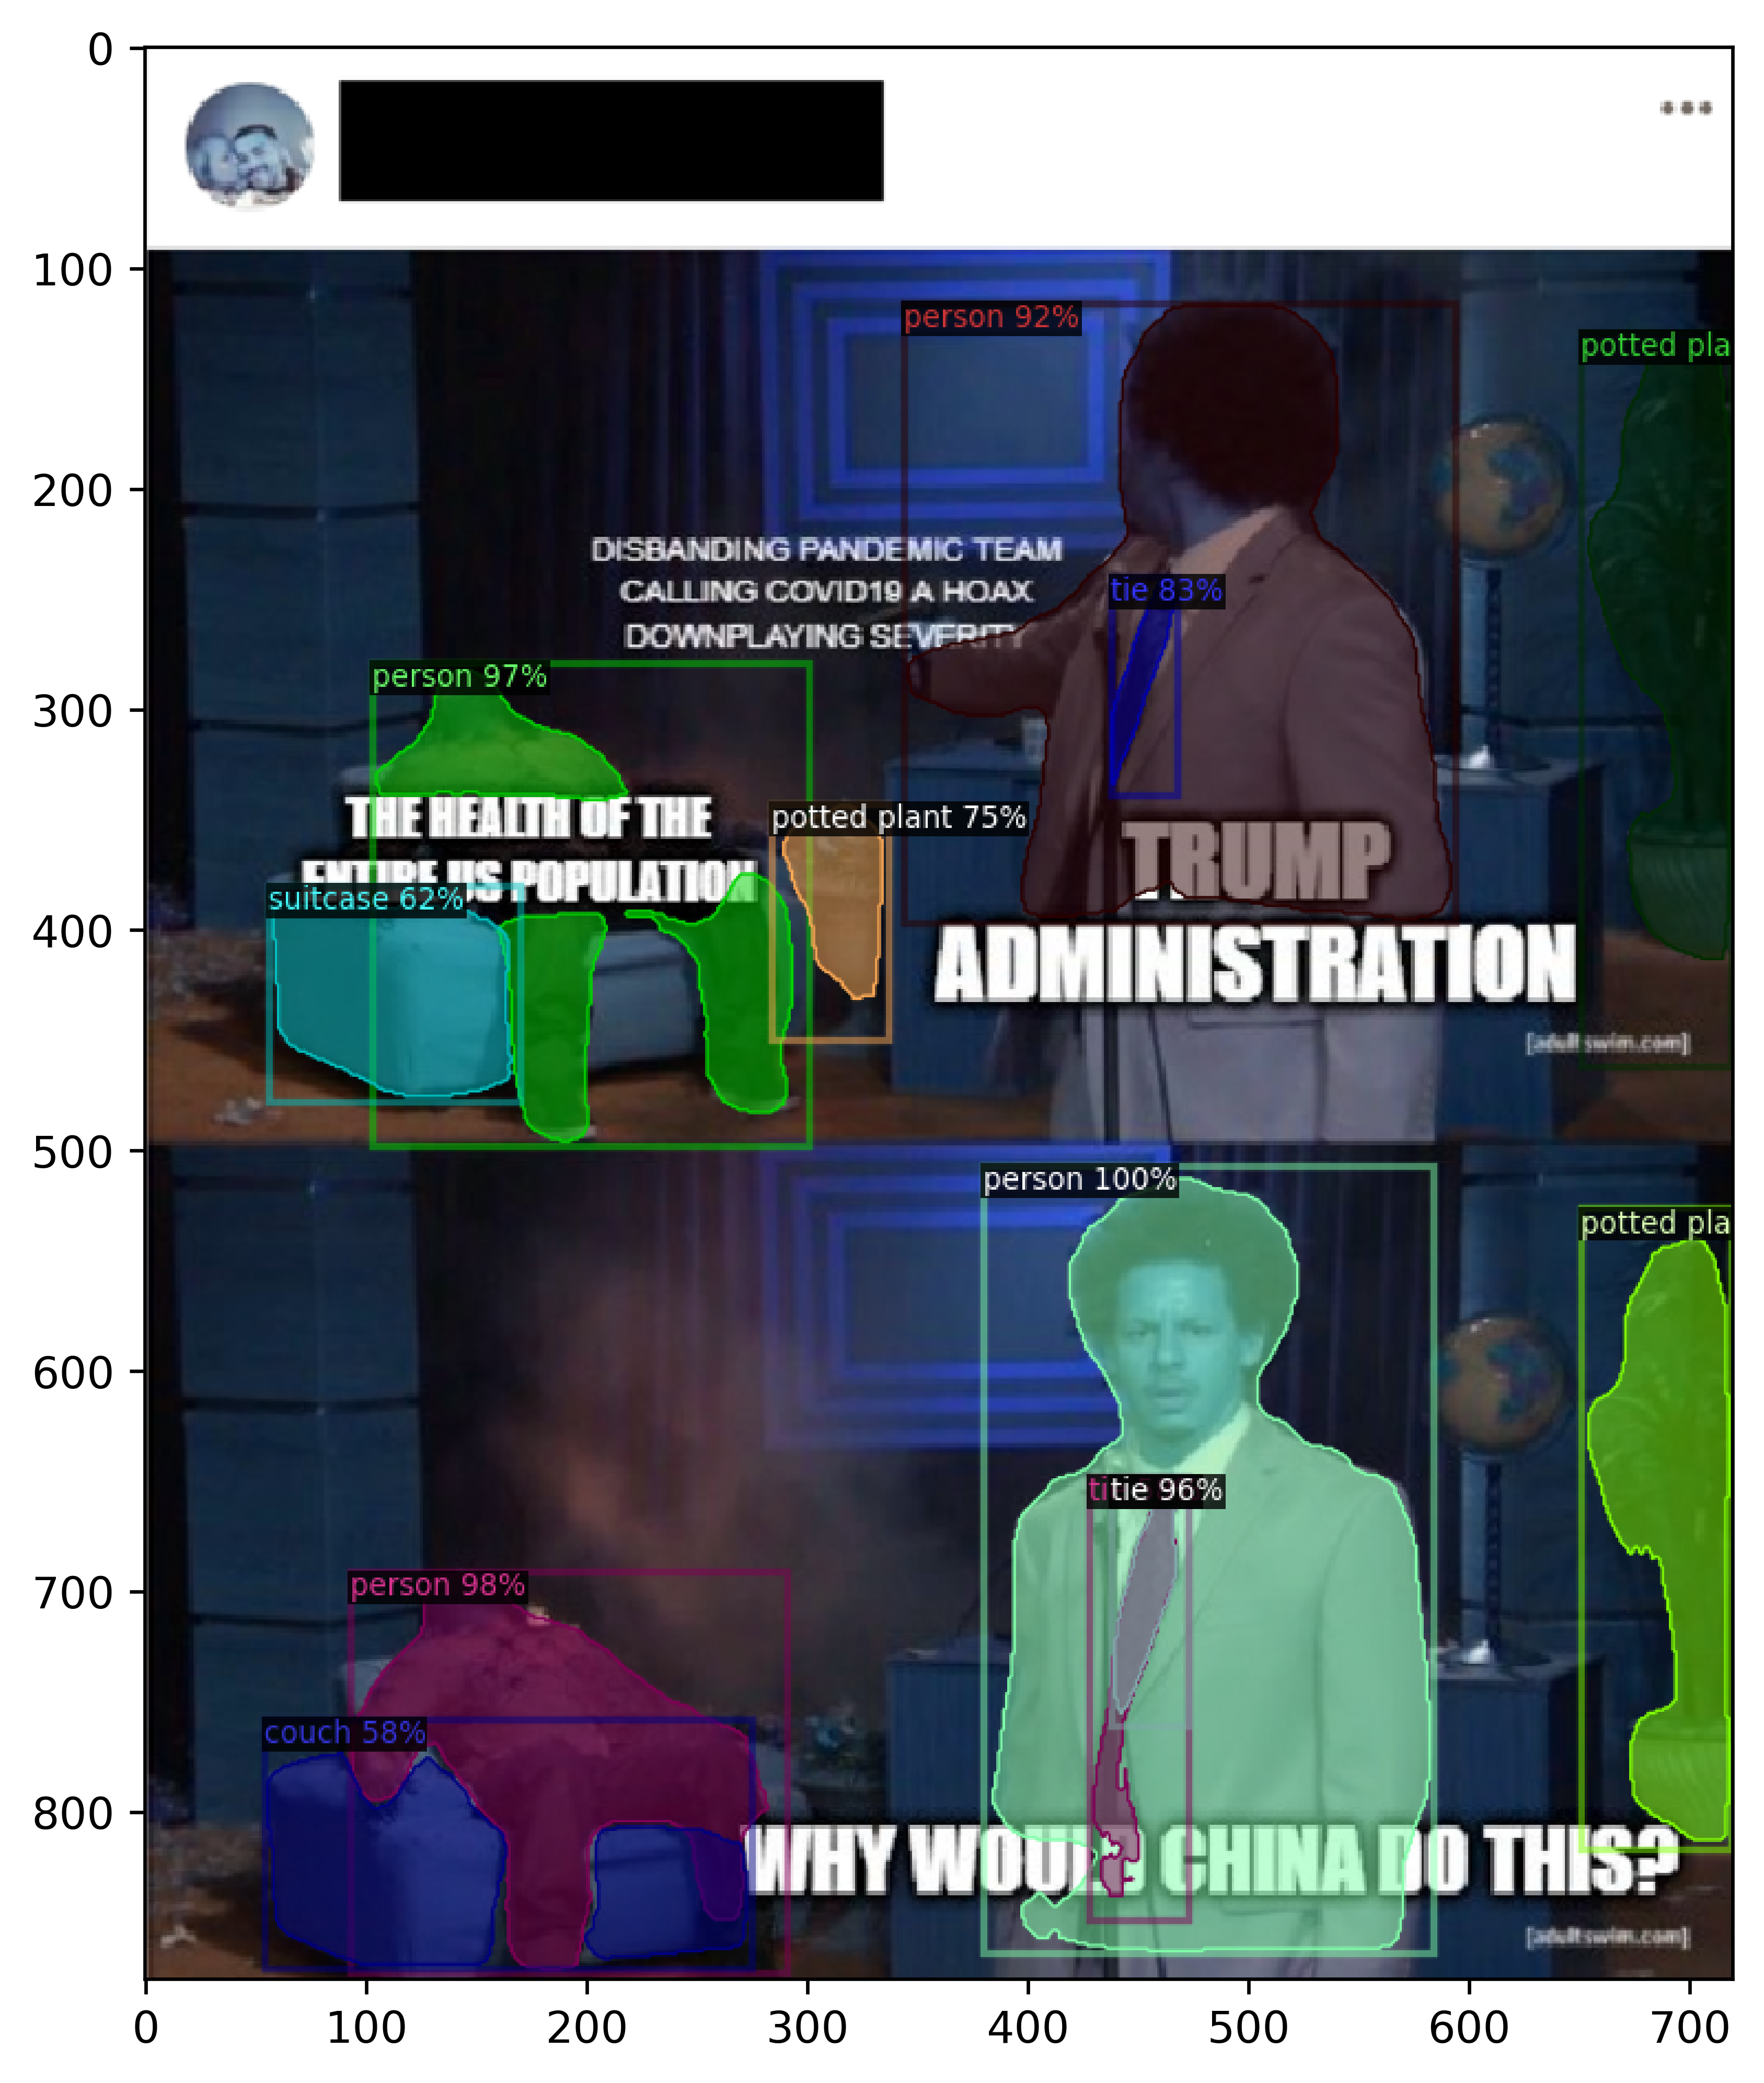

In [17]:
# We can use `Visualizer` to draw the predictions on the image.
v = detectron2.utils.visualizer.Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(10, 8), dpi=600)  # You can adjust the size (10, 8) and dpi as needed
plt.imshow(out.get_image()[:, :, ::-1])